In [35]:
import pandas as pd 
import scipy.interpolate  
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("../Datasets/sensorDataset/test/Breaker/ef4a7136-5773-4ef0-a576-62442bfd5f42.csv", header=None)

In [ ]:
data = data.to_numpy(dtype=np.float32, copy=True)

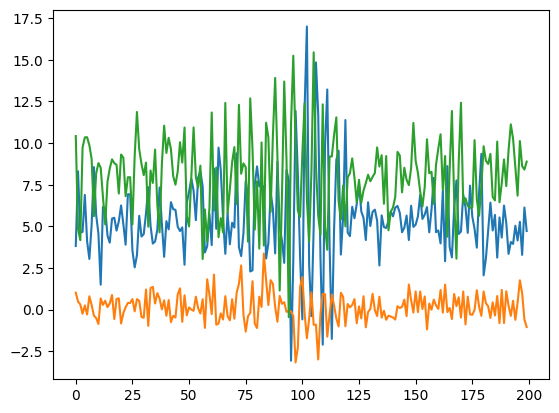

In [27]:
plt.plot(data)
plt.show()

In [28]:
transposedData = data.transpose()

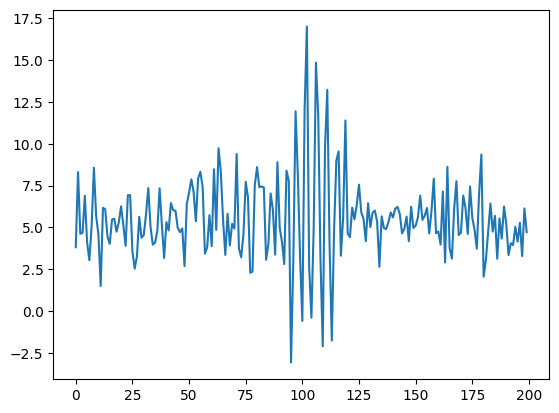

In [30]:
singleData = transposedData[0]
plt.plot(singleData)
plt.show()

In [59]:
scaleFactor = 5
smoothingFactor = 10

In [60]:
x = [(i * scaleFactor) for i in range(len(singleData))] 

# make a spline function to fit the data
spl = scipy.interpolate.make_splrep(x, singleData, s=smoothingFactor)

interpolatedData = [spl(i) for i in range(len(singleData) * scaleFactor)]

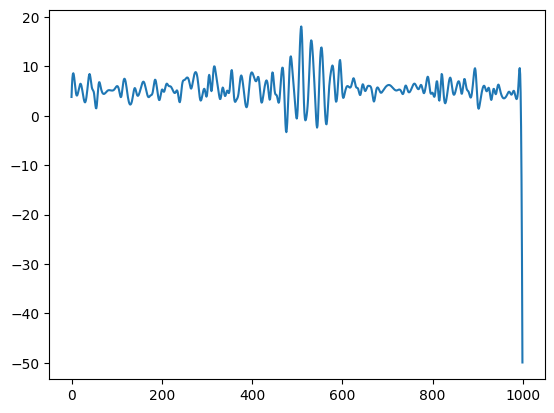

In [61]:
plt.plot(interpolatedData)
plt.show()

In [65]:
newData = []
for i in range(len(transposedData)):
    x = [(i * scaleFactor) for i in range(len(transposedData[i]))] 

    # make a spline function to fit the data
    spl = scipy.interpolate.make_splrep(x, transposedData[i], s=smoothingFactor)
    interpolatedData = [spl(i) for i in range(len(transposedData[i]) * scaleFactor)]
    newData.append(interpolatedData)

    

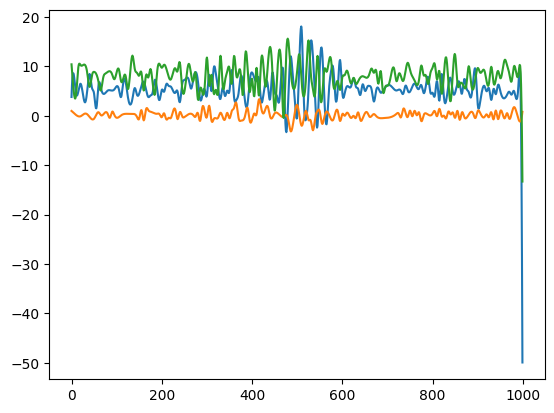

In [69]:
newData = np.asarray(newData)
plt.plot(newData.transpose())
plt.show()